<a href="https://colab.research.google.com/github/NehaKoulecar/Handwritten_Digit_Recognition/blob/master/HandwrittenDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handwritten Digit Recognition - convolutional neural network

In [140]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import platform
import math
import datetime



In [141]:
# Loading tensorboard extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


**Loading training and testing data**

The training data includes 60000 images of handwritten digits of 28x28 pixels.

The testing dataset include 10000 images.

In [142]:
# Loading MNIST dataset using Keras library
mnist_data = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

In [143]:
# Verifying the data
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [144]:
# Saving image parameters
(_, IMG_WIDTH, IMG_HEIGHT) = x_train.shape
IMG_CHANNELS = 1

print('IMAGE_HEIGHT:', IMG_HEIGHT)
print('IMAGE_WIDTH:', IMG_WIDTH);
print('IMAGE_CHANNELS:', IMG_CHANNELS);

IMAGE_HEIGHT: 28
IMAGE_WIDTH: 28
IMAGE_CHANNELS: 1


**Exploring data**

Data is an integer matrix

In [145]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


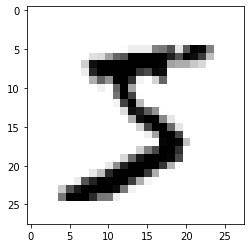

In [146]:
# Visualizing the first image in the matrix
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

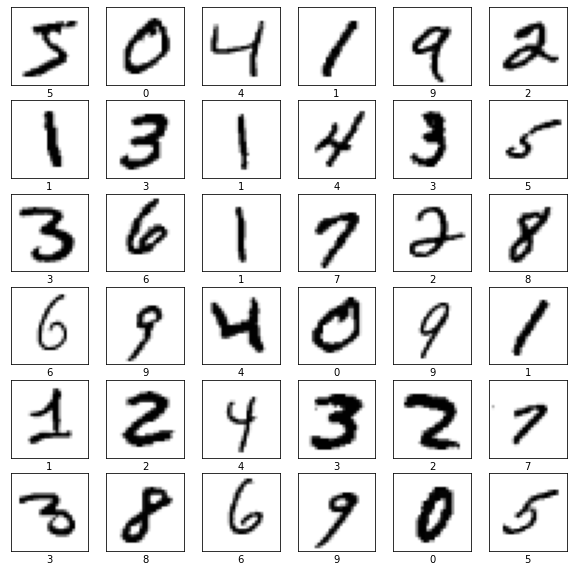

In [147]:
# Displaying first 36 images 
num_display = 36
no_cells = math.ceil(math.sqrt(num_display))
plt.figure(figsize=(10,10))
for i in range(num_display):
    plt.subplot(no_cells, no_cells, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.grid(False)
    plt.xlabel(y_train[i])
plt.show()

**Data Pre-processing**
We need to restructure our data and add a colour channel in order to employ convolution layers. As you may have seen, each digit currently has the shape of (28, 28), which denotes that it is a 28x28 matrix of colour values ranging from 0 to 255. In order for each pixel to potentially have many channels, we need to restructure it to the shape (28, 28, 1). (like Red, Green and Blue).

In [148]:
x_train_channels = x_train.reshape(
    x_train.shape[0],
    IMG_WIDTH,
    IMG_HEIGHT,
    IMG_CHANNELS
)

x_test_channels = x_test.reshape(
    x_test.shape[0],
    IMG_WIDTH,
    IMG_HEIGHT,
    IMG_CHANNELS
)

In [149]:
print('x_train_channels:', x_train_channels.shape)
print('x_test_channels:', x_test_channels.shape)

x_train_channels: (60000, 28, 28, 1)
x_test_channels: (10000, 28, 28, 1)


**Normalizing data**

Converting value range from [0...255] to [0...1].

In [150]:
x_train_normalize = x_train_channels / 255
x_test_normalize = x_test_channels / 255

In [151]:
# Verifying one row post normalization.
x_train_normalize[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

Building the model

In [152]:
# Sequential Keras model with two pairs of Convolution2D and MaxPooling2D layers.

model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.Convolution2D(
    input_shape=(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS),
    strides=1,
    filters=8,
    kernel_size=5,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model1.add(tf.keras.layers.MaxPooling2D(
    strides=(2, 2),
    pool_size=(2, 2) 
))

model1.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    strides=1,
    activation=tf.keras.activations.relu,
    filters=16,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model1.add(tf.keras.layers.MaxPooling2D(
    strides=(2, 2),
    pool_size=(2, 2)    
))

model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model1.add(tf.keras.layers.Dropout(0.2))

model1.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))


In [153]:
model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 12, 12, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 4, 4, 16)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 128)             

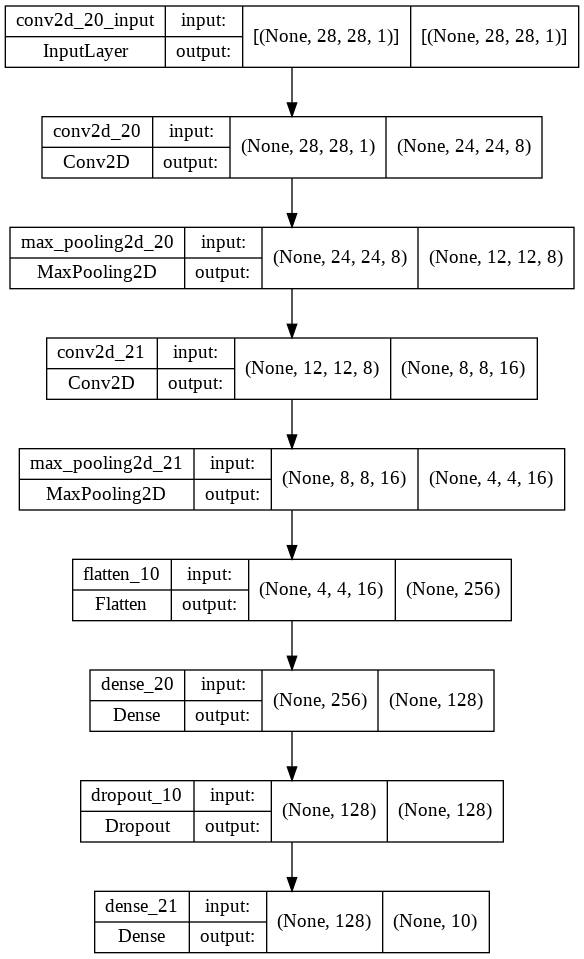

In [154]:
# Plotting the model
tf.keras.utils.plot_model(                     
    model1,
    show_layer_names=True,
    show_shapes=True 
)

Compiling the model

In [155]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model1.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=adam_optimizer,
    metrics=['accuracy'],
)

Training the model

In [156]:
log_dir1=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=log_dir1, histogram_freq=1)

training_hist = model1.fit(
    x_train_normalize,
    y_train,
    epochs=15,
    validation_data=(x_test_normalize, y_test),
    callbacks=[tensorboard_callback1]
)

Epoch 1/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2082 - accuracy: 0.9355 - val_loss: 0.0670 - val_accuracy: 0.9778
Epoch 2/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0677 - accuracy: 0.9790 - val_loss: 0.0400 - val_accuracy: 0.9871
Epoch 3/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0496 - accuracy: 0.9851 - val_loss: 0.0485 - val_accuracy: 0.9836
Epoch 4/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0348 - val_accuracy: 0.9886
Epoch 5/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0337 - accuracy: 0.9893 - val_loss: 0.0271 - val_accuracy: 0.9916
Epoch 6/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0287 - val_accuracy: 0.9910
Epoch 7/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0246 - accuracy: 0.9923 - val_loss: 0.0290 -

Examining how the loss function changed over the course of the training. On each next epoch, we anticipate it to get smaller and smaller.



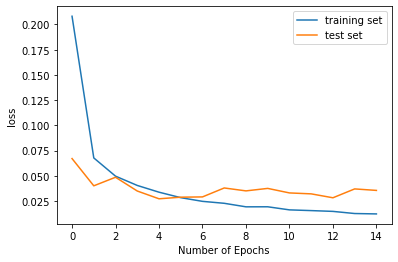

In [158]:
plt.xlabel('Number of Epochs')
plt.ylabel('loss')
plt.plot(training_hist.history['loss'], label='training set')
plt.plot(training_hist.history['val_loss'], label='test set')
plt.legend()

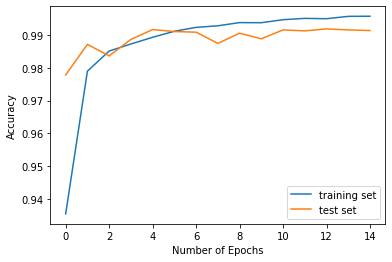

In [159]:
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.plot(training_hist.history['accuracy'], label='training set')
plt.plot(training_hist.history['val_accuracy'], label='test set')
plt.legend()

**Evaluating the model accuracy**

Comparing the accuracy of the model on training dataset and testing dataset.

In [160]:

train_loss, train_acc = model1.evaluate(x_train_normalize, y_train)

1875/1875 [==============================] - 12s 7ms/step - loss: 0.0043 - accuracy: 0.9985


In [161]:
# Printing train loss and train accuracy
print('Train Loss: ', train_loss)
print('Train Accuracy: ', train_acc)

Train Loss:  0.004345548804849386
Train Accuracy:  0.9985166788101196


In [162]:
val_loss, val_acc = model1.evaluate(x_test_normalize, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0354 - accuracy: 0.9913


In [164]:
print('Validation Loss: ', val_loss)
print('Validation Accuracy: ', val_acc)

Validation Loss:  0.035438720136880875
Validation Accuracy:  0.9912999868392944


Saving the model

In [165]:
model1_name = 'cnn_digit_recognition.h5'
model1.save(model1_name, save_format='h5')

In [166]:
loaded_model1 = tf.keras.models.load_model(model1_name)

In [167]:
#Predicting the digits
predictions1_one_hot = loaded_model1.predict([x_test_normalize])   


In [168]:
print('predictions_one_hot:', predictions1_one_hot.shape)

predictions_one_hot: (10000, 10)


There are ten probability for each forecast (one for each number from 0 to 9). Since our model will be most confident with the digit with the highest probability, we must choose that digit.

In [169]:
pd.DataFrame(predictions1_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,7.637020e-17,2.866455e-11,4.321611e-12,1.156719e-09,1.746147e-10,1.865668e-15,1.821200e-21,1.000000e+00,6.973496e-13,3.113987e-12
1,2.792252e-10,3.919481e-11,1.000000e+00,7.745573e-18,8.909753e-20,3.731201e-23,3.716586e-14,4.006324e-16,2.478429e-19,2.588576e-21
2,1.746388e-08,9.999973e-01,7.871367e-07,4.163635e-12,1.884251e-08,3.361619e-07,4.556700e-08,3.168441e-07,1.165794e-06,5.963697e-09
3,1.000000e+00,1.965598e-15,5.910659e-13,6.499160e-16,5.178224e-16,1.648485e-12,1.276902e-10,2.053550e-15,6.248049e-12,2.284165e-11
4,2.405305e-09,1.395469e-11,1.667919e-08,1.597626e-11,9.972908e-01,8.725442e-09,1.447518e-10,1.160890e-11,7.099992e-08,2.709075e-03
...,...,...,...,...,...,...,...,...,...,...
9995,4.421168e-16,3.444583e-12,1.000000e+00,6.781721e-14,1.064771e-22,3.596519e-26,2.768440e-22,3.567505e-10,6.501364e-17,1.778729e-26
9996,1.628324e-18,1.281078e-11,3.806104e-13,1.000000e+00,5.260819e-21,1.647847e-08,1.106669e-18,3.709953e-16,9.249477e-12,6.279093e-14
9997,7.279859e-22,2.249397e-13,4.697952e-15,4.369703e-19,1.000000e+00,7.225323e-16,2.010284e-16,6.549607e-13,1.141176e-11,6.061537e-12
9998,1.781387e-16,3.119063e-20,3.265182e-22,3.650742e-13,1.341978e-21,1.000000e+00,2.127275e-13,3.383895e-17,7.161381e-10,1.922717e-16


In [170]:
# Extracting prediction with highest probability
predictions1 = np.argmax(predictions1_one_hot, axis=1)
pd.DataFrame(predictions1)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [171]:
print(predictions1[4])

4


Let's print the fourth image from a test set to see if model's prediction is correct.

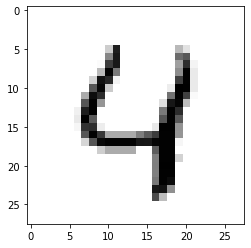

In [172]:
plt.imshow(x_test_normalize[4].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

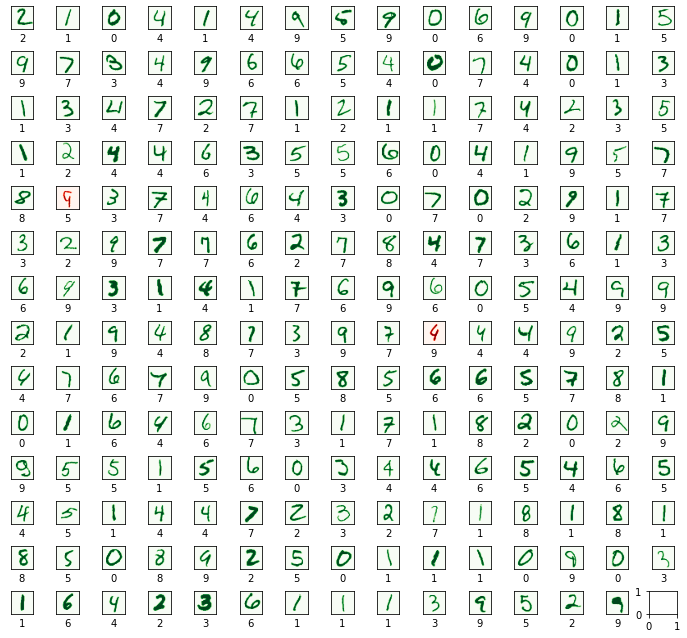

In [173]:
num_display = 210
no_cells = math.ceil(math.sqrt(num_display))
plt.figure(figsize=(12, 12))

for plot_index in range(num_display):    
    predicted_label = predictions1[plot_index]
    plt.yticks([])
    plt.xticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.imshow(x_test_normalize[plot_index].reshape((IMG_WIDTH, IMG_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)
    plt.subplot(no_cells, no_cells, plot_index + 1)
    
plt.subplots_adjust(hspace=1.0, wspace=0.6)
plt.show()

Confusion matrix plot

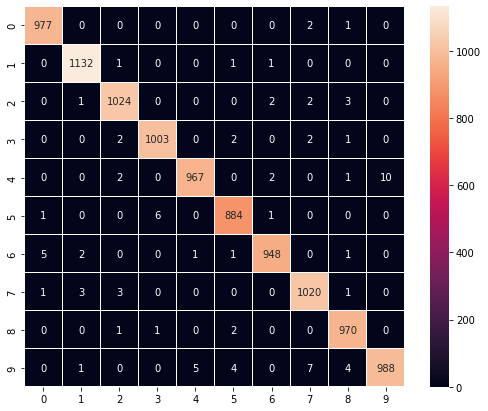

In [174]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions1)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    linewidths=.5,
    annot=True,
    square=True,
    fmt="d",
    ax=ax
)
plt.show()